In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import calplot
import seaborn as sns

/tmp/ipykernel_91115/2243410926.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data and verifying that it has loaded correctly

In [3]:
data = pd.read_excel(r"purchase_data_excel.xlsx")

In [4]:
data.head()

,Date,Item,Quantity,Rate,Discount (if any),Total,Category
0,2023-11-03,Sketch Pen,20.0,11.46,0,229.2,Stationary
1,2023-11-03,Sketch Pen,10.0,7.50,0,75.0,Stationary
2,2023-11-03,Sketch Pen,50.0,2.33,0,116.5,Stationary
3,2023-11-11,Zip Lock Cover,1.0,80.00,0,80.0,Household Item
4,2023-11-11,Zip Lock Cover,1.0,90.00,0,90.0,Household Item


In [5]:
data["Month"] = data["Date"].apply(lambda x: x.month)
data["Day"] = data["Date"].apply(lambda x: x.day)
data["Day_of_Week"] = data["Date"].apply(lambda x: x.weekday())

In [6]:
data.head()

,Date,Item,Quantity,Rate,Discount (if any),Total,Category,Month,Day,Day_of_Week
0,2023-11-03,Sketch Pen,20.0,11.46,0,229.2,Stationary,11,3,4
1,2023-11-03,Sketch Pen,10.0,7.50,0,75.0,Stationary,11,3,4
2,2023-11-03,Sketch Pen,50.0,2.33,0,116.5,Stationary,11,3,4
3,2023-11-11,Zip Lock Cover,1.0,80.00,0,80.0,Household Item,11,11,5
4,2023-11-11,Zip Lock Cover,1.0,90.00,0,90.0,Household Item,11,11,5


# Analysis of Data

## Purchase per visit to suppliers

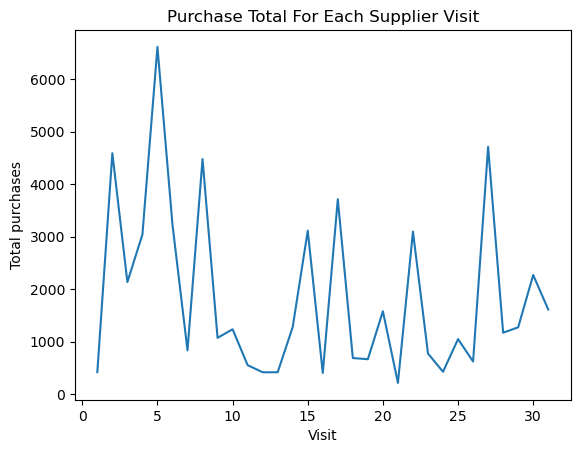

In [7]:
dates = data["Date"].unique()
vists = np.arange(1, 32)
day_purch = []
for date in dates:
    day_purch.append(data[data["Date"] == date]["Total"].sum())

plt.plot(vists, day_purch)
plt.title("Purchase Total For Each Supplier Visit")
plt.xlabel("Visit")
plt.ylabel("Total purchases")
# plt.savefig("day_wise.png")
plt.show()

## Purchase totals of items bought rarely

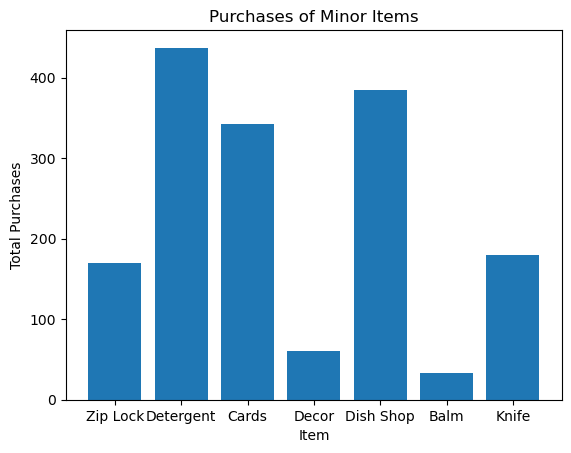

In [8]:
lower = data[(data["Category"] == "Cooking Ingredients") | 
             (data["Category"] == "Household Item") | 
             (data["Category"] == "Entertainment")]
cat_totals = []
for cat in lower["Item"].unique():
    cat_totals.append(data[data["Item"] == cat]["Total"].sum())

plt.bar(["Zip Lock", "Detergent", "Cards", "Decor", "Dish Shop", "Balm", "Knife"], 
        [170, 437, 342, 60, 384, 33, 180])
plt.title("Purchases of Minor Items")
plt.xlabel("Item")
plt.ylabel("Total Purchases")
plt.show()

## Snacks purchases over the period

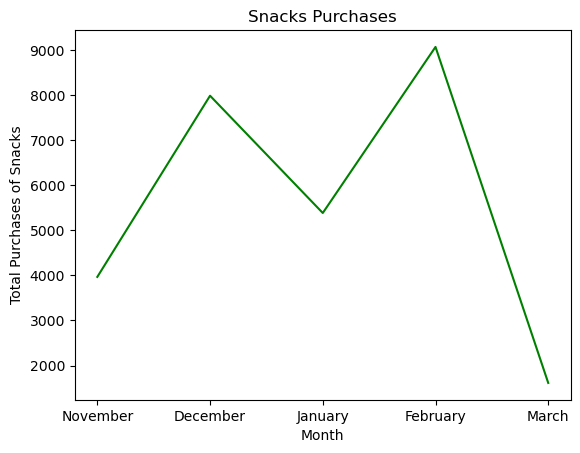

In [9]:
month_totals = []
for month in data["Month"].unique():
    month_totals.append(data[(data["Month"] == month) & (data["Category"] == "Snacks")]["Total"].sum())

plt.plot(["November", "December", "January", "February", "March"], month_totals, c="green")
plt.title("Snacks Purchases")
plt.xlabel("Month")
plt.ylabel("Total Purchases of Snacks")
# plt.savefig("snacks.png")
plt.show()

## Stationary purchases

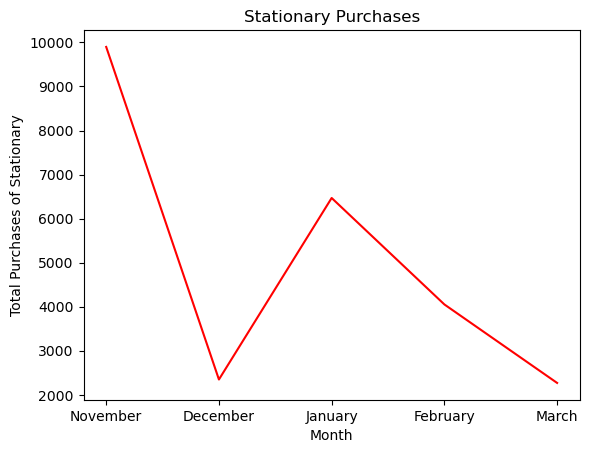

In [10]:
month_totals = []
for month in data["Month"].unique():
    month_totals.append(data[(data["Month"] == month) & (data["Category"] == "Stationary")]["Total"].sum())

plt.plot(["November", "December", "January", "February", "March"], month_totals, c="red")
plt.title("Stationary Purchases")
plt.xlabel("Month")
plt.ylabel("Total Purchases of Stationary")
plt.show()

## Purchases of ice cream and soft drinks for December and February

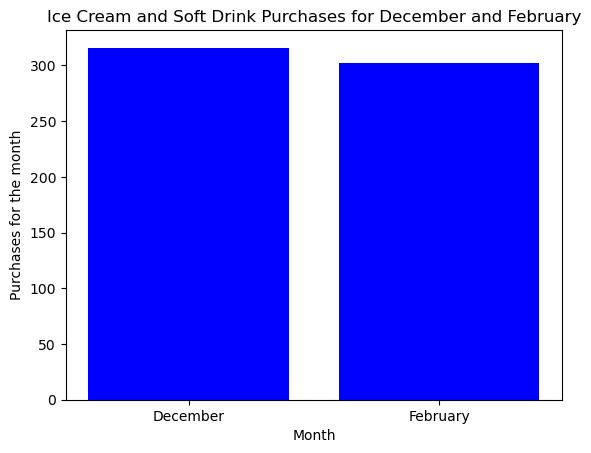

In [11]:
plt.bar(["December", "February"], [315.85, 302.5], color="blue")
plt.title("Ice Cream and Soft Drink Purchases for December and February")
plt.xlabel("Month")
plt.ylabel("Purchases for the month")
plt.show()

## Distribution of purchase values for each category

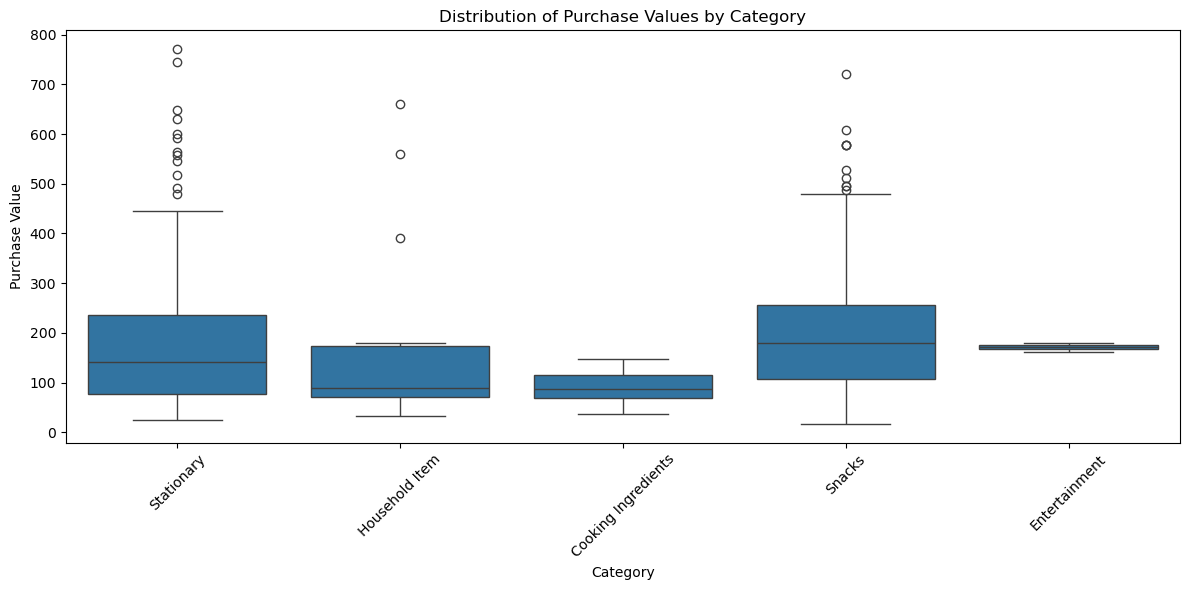

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Total', data=data)
plt.title('Distribution of Purchase Values by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation between purchases of different categories

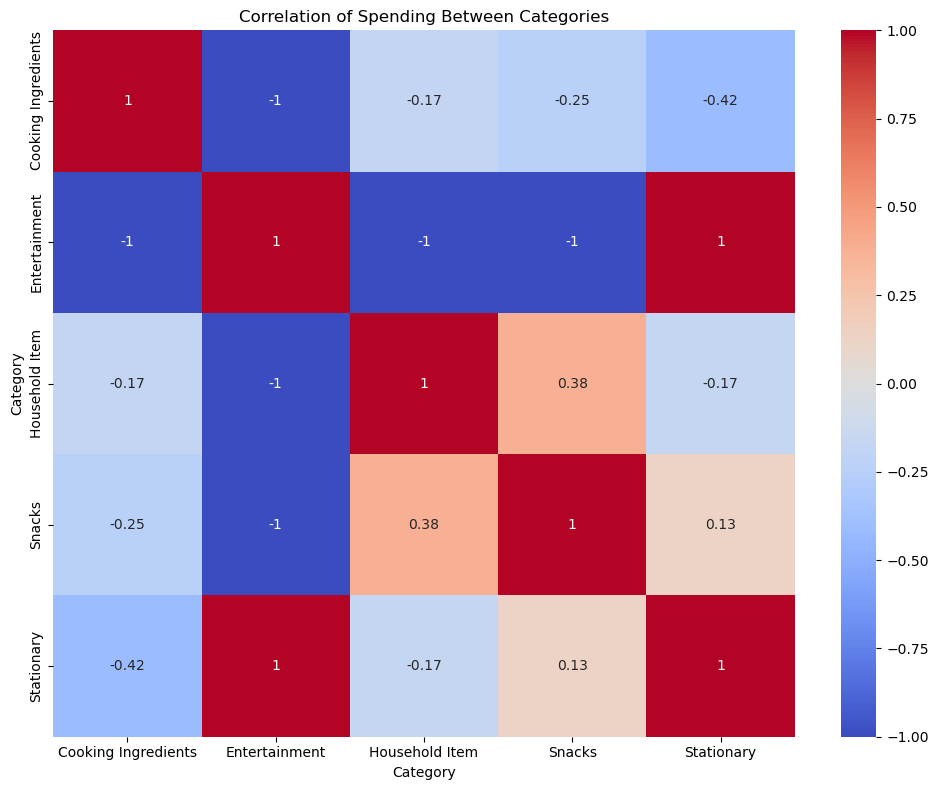

In [13]:
category_pivot = data.pivot_table(values='Total', index='Date', columns='Category', aggfunc='sum')
correlation = category_pivot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Spending Between Categories')
plt.tight_layout()
plt.show()

## Scatter plot displaying total purchases vs purchase frequency for select products

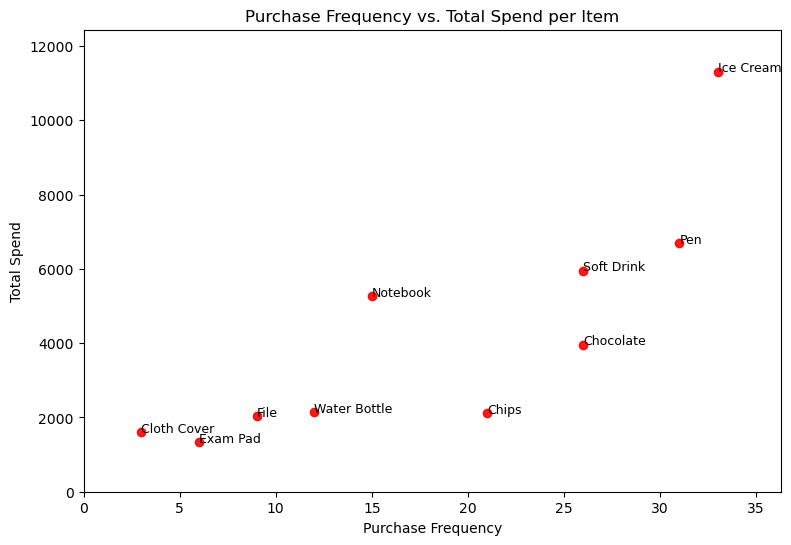

In [14]:
# Group by item and calculate the total spend and purchase frequency
sub_data = data[
        (data["Item"] == "Pen") |
        (data["Item"] == "Ice Cream") |
        (data["Item"] == "Soft Drink") |
        (data["Item"] == "Notebook") |
        (data["Item"] == "Chocolate") |
        (data["Item"] == "Water Bottle") |
        (data["Item"] == "Chips") |
        (data["Item"] == "File") |
        (data["Item"] == "Cloth Cover") |
        (data["Item"] == "Exam Pad")
]
item_summary = sub_data.groupby('Item').agg({
    'Quantity': 'count', 
    'Total': 'sum'     
}).reset_index()


item_summary.rename(columns={'Quantity': 'Purchase Frequency'}, inplace=True)


plt.figure(figsize=(9, 6))
plt.scatter(item_summary['Purchase Frequency'], item_summary['Total'], color='red', alpha=0.9)

plt.title('Purchase Frequency vs. Total Spend per Item')

plt.xlim(0, item_summary['Purchase Frequency'].max() * 1.1)  # Add a 10% margin
plt.ylim(0, item_summary['Total'].max() * 1.1) 
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend')
plt.grid(False)

for i, item in item_summary.iterrows():
    plt.text(item['Purchase Frequency'], item['Total'], item['Item'], fontsize=9, ha='left')

plt.show()

## Average purchase quantity for top 5 most purchased products

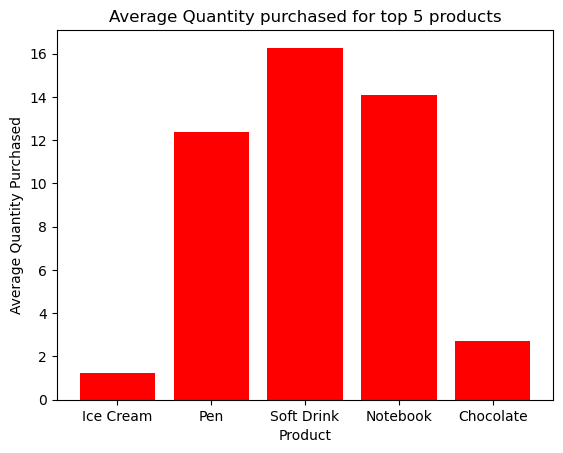

In [15]:
avg_quant = []
items = ["Ice Cream", "Pen", "Soft Drink", "Notebook", "Chocolate"]
for item in items:
    avg_quant.append(data[data["Item"] == item]["Quantity"].mean())
plt.bar(items, avg_quant, color="red")
plt.xlabel("Product")
plt.ylabel("Average Quantity Purchased")
plt.title("Average Quantity purchased for top 5 products")
#plt.savefig("quantity.png")
plt.show()

## Average unit price for top 5 products

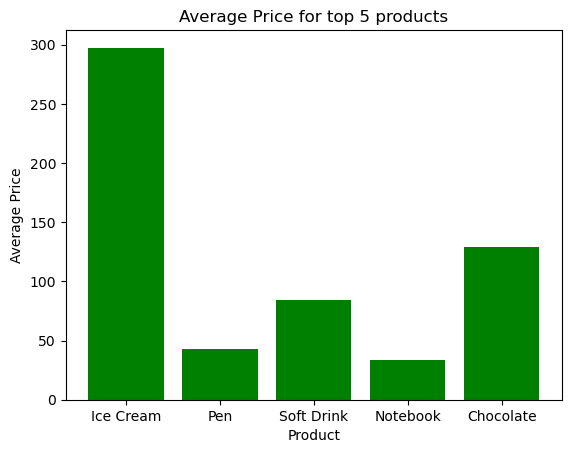

In [16]:
avg_price = []
items = ["Ice Cream", "Pen", "Soft Drink", "Notebook", "Chocolate"]
for item in items:
    avg_price.append(data[data["Item"] == item]["Rate"].mean())
plt.bar(items, avg_price, color="green")
plt.xlabel("Product")
plt.ylabel("Average Price")
plt.title("Average Price for top 5 products")
plt.show()

## Metadata for top 5 products

In [17]:
items = ["Ice Cream", "Pen", "Soft Drink", "Notebook", "Chocolate"]
for item in items:
    print(item)
    print("Minimum purchase value: ", data[data["Item"] == item]["Rate"].min())
    print("Maximum purchase value: ", data[data["Item"] == item]["Rate"].max())
    print("Average purchase value: ", data[data["Item"] == item]["Rate"].mean())
    print("Standard Deviation: ", np.array(data[data["Item"] == item]["Rate"].std()))
    print("\n")

Ice Cream
Minimum purchase value:  90.0
Maximum purchase value:  720.0
Average purchase value:  297.4024242424243
Standard Deviation:  158.94896323250867


Pen
Minimum purchase value:  7.5
Maximum purchase value:  160.0
Average purchase value:  42.58516129032258
Standard Deviation:  32.58487009548734


Soft Drink
Minimum purchase value:  4.13
Maximum purchase value:  220.0
Average purchase value:  84.4673076923077
Standard Deviation:  84.37712578928924


Notebook
Minimum purchase value:  4.0
Maximum purchase value:  75.0
Average purchase value:  33.656
Standard Deviation:  20.55833956608086


Chocolate
Minimum purchase value:  8.26
Maximum purchase value:  308.47
Average purchase value:  129.24653846153845
Standard Deviation:  67.7154087600338




## Comparison of purchases with discount vs without discount

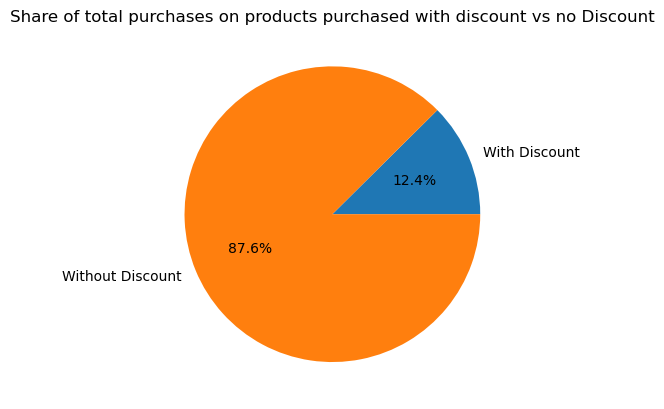

In [18]:
x = 7176
y = 50540

plt.pie([x, y], labels=["With Discount", "Without Discount"], autopct='%1.1f%%')
plt.title("Share of total purchases on products purchased with discount vs no Discount")
plt.show()


## Monthly trend for total purchases over the given period

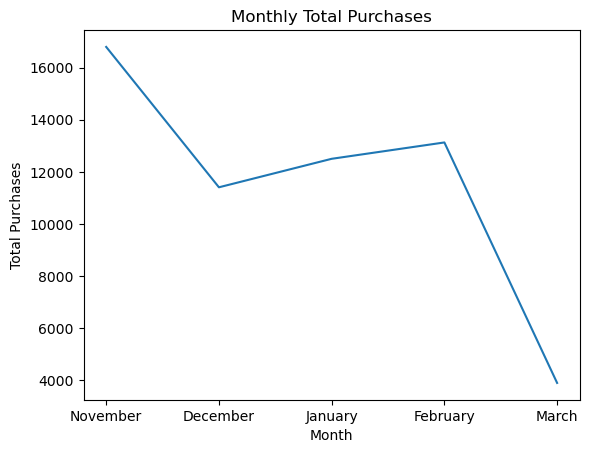

In [19]:
month_totals = []
for month in data["Month"].unique():
    month_totals.append(data[data["Month"] == month]["Total"].sum())
plt.plot(["November", "December", "January", "February", "March"], month_totals)
plt.xlabel("Month")
plt.ylabel("Total Purchases")
plt.title("Monthly Total Purchases")
plt.show()